## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

### Loading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\HP\Desktop\DataScience - DT\DSData-master\Automobile_Insurance_Fraud.csv")

In [3]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

## Exploratory Data Analysis

In [4]:
df.shape

(1000, 40)

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
# we can see some missing values denoted by '?'
df.replace('?', np.nan, inplace = True)

In [7]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

Looking at the dataset, we are able to see that there are 1000 rows and 40 columns. There are a total of 39 features(21 columns which are categorical in nature and 18 which are continuous/discrete) and a label(fraud reported) which we are going to predict by help of the 39 features. 

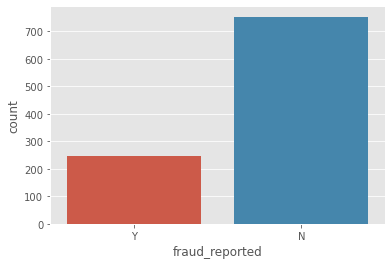

N    753
Y    247
Name: fraud_reported, dtype: int64

In [10]:
ax = sns.countplot(x='fraud_reported',data=df)
plt.show() 
df['fraud_reported'].value_counts()

We are able to understand that there are 753 non-fraudulent cases and 247 fraudulent cases. Lets analyze the features to understand what happens - beginning with a histogram for the numerical columns

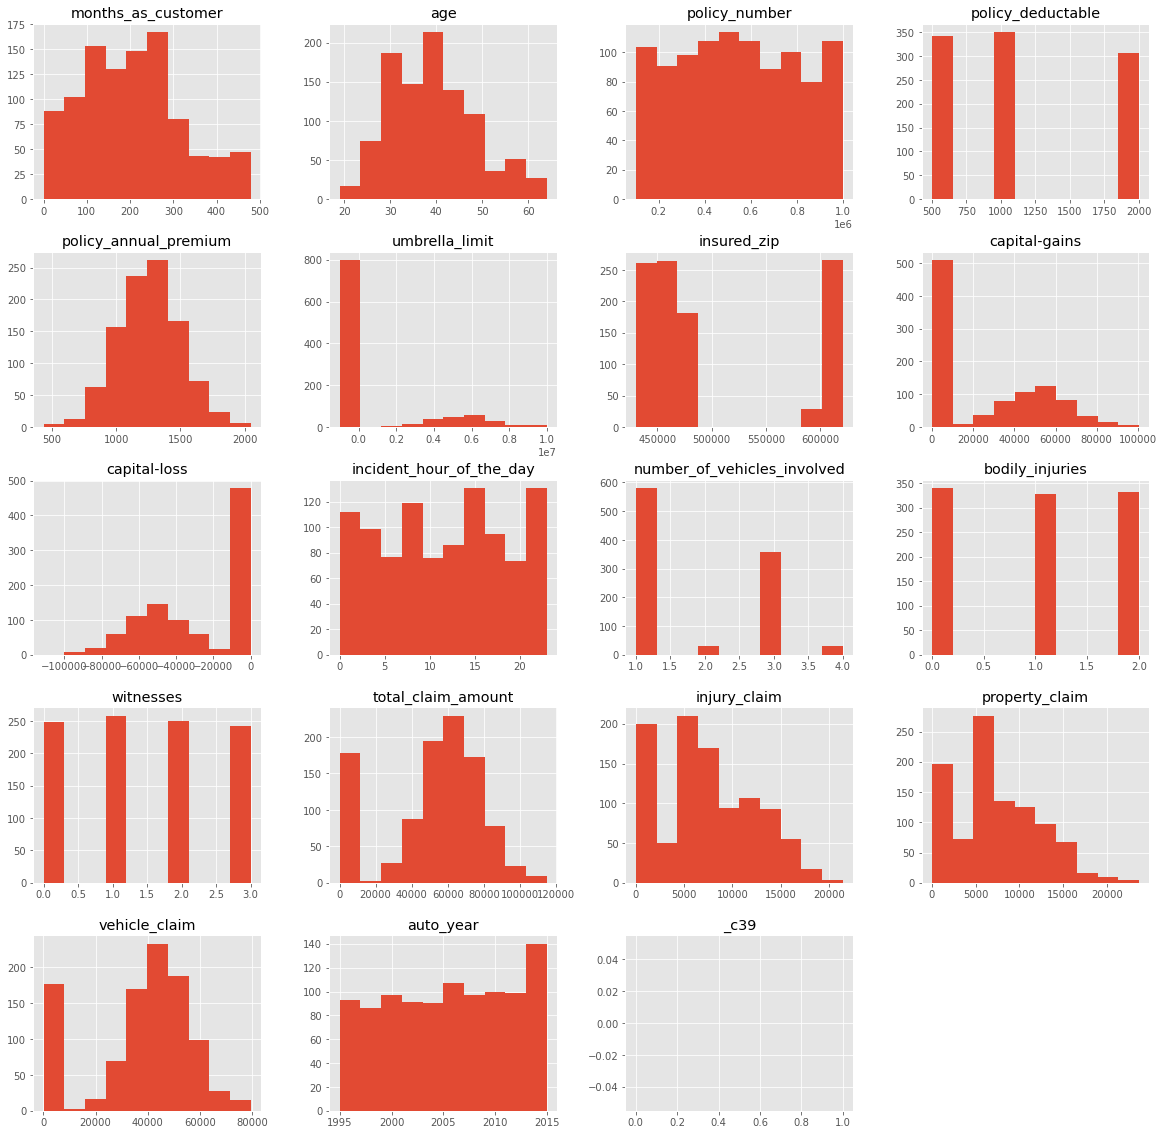

In [11]:
df.hist(figsize = (20,20))
plt.show()

Looking at the graphical representation for the columns, we are able to draw the following conclusions:
    
    1. The automobiles involved in the accidents are spread between 1995 and 2015 with a majority of them from 2015
    2. In almost 175 cases, there has been no claim received against their insurance claim
    3. The annual premiums of the automobiles are priced between 500 and 2000
    4. More than 250 cases have no witness, making it highly susceptible to insurance fraud
    5. Almost 60% of the total cases have only one vehicle involved in the automobile accident
    6. A majority of the people involved in the accident have an age group of 30 and 40(almost 55% of the total automobiles)
    7. Almost 80% of the total cases have no umbrella limit, also referred to as excess liability insurance (insurance over the already sanctioned limit of the parent policy)
    8. There are a total of 0 to 3 witnesses in all the cases with there being an even spread of cases accross witnesses
    9. A majority of vehicle claims bring in between 30000 and 60000 and a majority of the property claims bring in 5000. The majority of the overall claim amounts are between 40000 and 70000(which includes injury, property, and vehicle damages)
    10. Atleast 50% of the total cases have no capital loss overall.
    
Let us check how the individual features affect the label by means of count plot and try and analyze the patterns(if any)

<bound method IndexOpsMixin.value_counts of policy_state
IL    22.781065
IN    25.483871
OH    25.852273
Name: fraud_reported, dtype: float64>

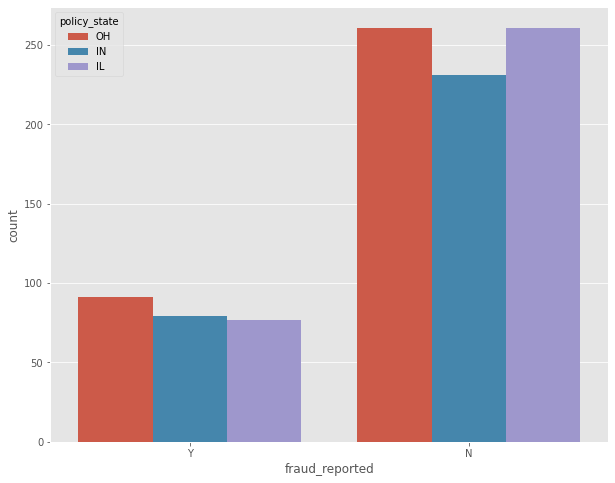

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(x='fraud_reported', hue="policy_state", data=df)
percentag = ((df[df['fraud_reported'] == 'Y'].groupby('policy_state').agg('count'))/(df.groupby('policy_state').agg('count')) *100)['fraud_reported']
percentag.value_counts

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

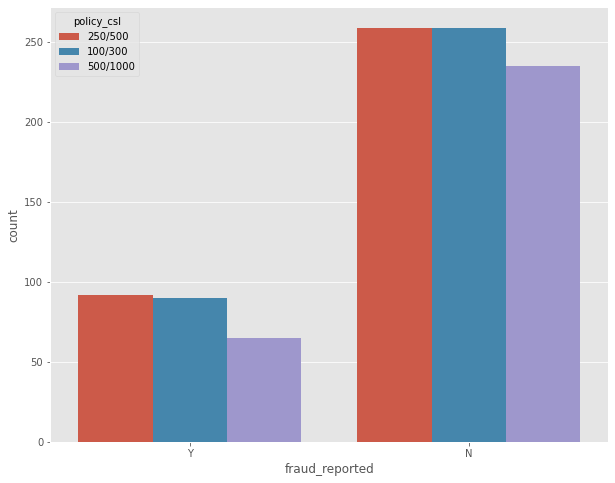

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(x='fraud_reported', hue="policy_csl", data=df)

<bound method IndexOpsMixin.value_counts of insured_sex
FEMALE    23.463687
MALE      26.133909
Name: fraud_reported, dtype: float64>

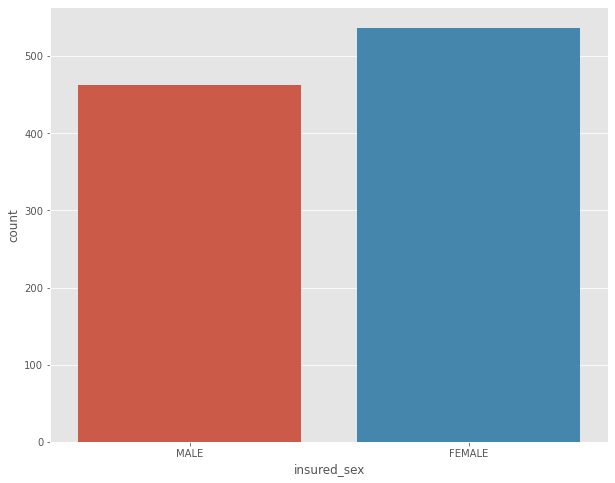

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(x='insured_sex', data=df)
percent_gender = ((df[df['fraud_reported'] == 'Y'].groupby('insured_sex').agg('count'))/(df.groupby('insured_sex').agg('count')) *100)['fraud_reported']
percent_gender.value_counts

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

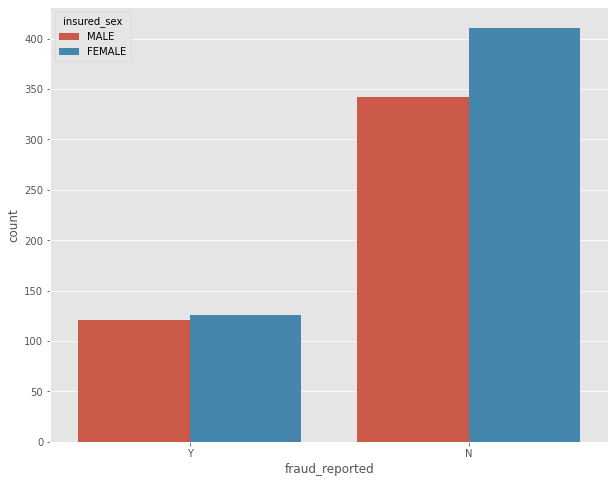

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(x='fraud_reported', hue="insured_sex", data=df)

Looking at the above columns, we are able to see that the cases are spread in three states - Ohio, Illionis, and Indiana. The percentage of frauds reported are similar in all three states(about 25%) with Ohio having a slightly higher rate of frauds reported. Also looking at the percentages based on gender of the people, Male have a slightly higher chance of commiting fraud despite having more women as part of the group who were studied. 

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

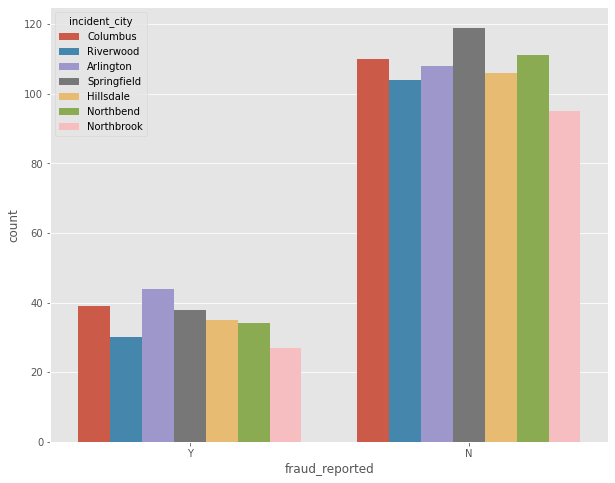

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(x='fraud_reported', hue="incident_city", data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

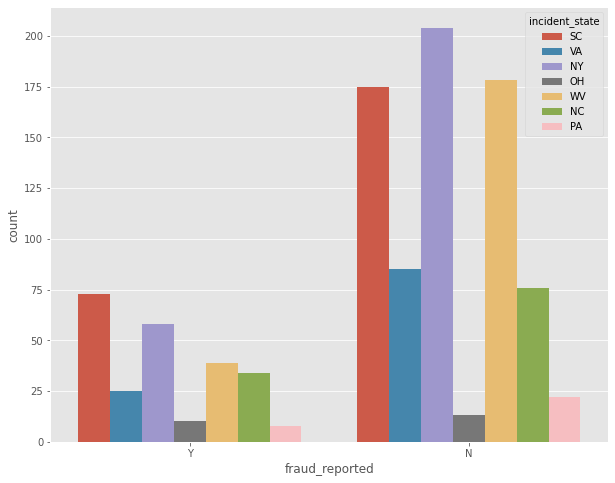

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(x='fraud_reported', hue="incident_state", data=df)

In [18]:
percent_state = ((df[df['fraud_reported'] == 'Y'].groupby('incident_state').agg('count'))/(df.groupby('incident_state').agg('count')) *100)['fraud_reported']
percent_state

incident_state
NC    30.909091
NY    22.137405
OH    43.478261
PA    26.666667
SC    29.435484
VA    22.727273
WV    17.972350
Name: fraud_reported, dtype: float64

Based on the information given regarding incident state and incident city, we are able to draw the following conclusions

    1. Arlingon(Texas) has the maximum frauds detected closely followed by Columbus(Ohio) and Springfield(Illinois)
    2. The maximum frauds are reported in the South Carolina and this is closely followed by New York(depite having more cases) 
    3. However, if we look at the cases of fraud percentage wise, Ohio stands ahead(almost 45% of the total cases are reported as a fraud) followed by North Carolina and South Carolina

police_report_available
NO     25.072886
YES    22.929936
Name: fraud_reported, dtype: float64

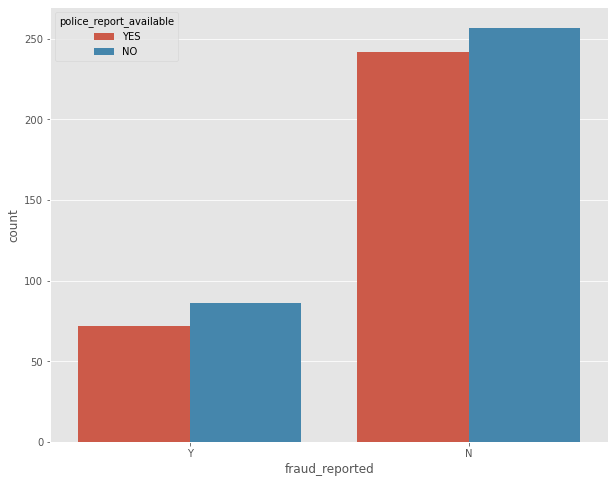

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(x='fraud_reported', hue="police_report_available", data=df)
percent_policereport = ((df[df['fraud_reported'] == 'Y'].groupby('police_report_available').agg('count'))/(df.groupby('police_report_available').agg('count')) *100)['fraud_reported']
percent_policereport 

In almost 35% of the cases, we are not sure whether a police report is available or not. We need to investigate further to see what happens in those cases. But it is clear that there is a slightly higher percentage of frauds being reported in this category

bodily_injuries
0    23.529412
1    23.475610
2    27.108434
Name: fraud_reported, dtype: float64

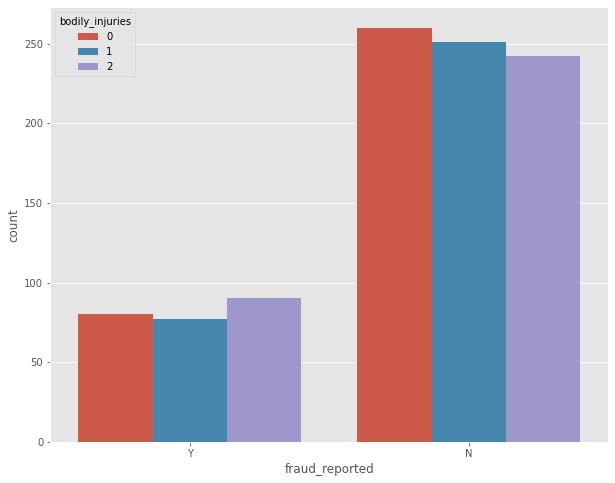

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(x='fraud_reported', hue="bodily_injuries", data=df)
percent_injury = ((df[df['fraud_reported'] == 'Y'].groupby('bodily_injuries').agg('count'))/(df.groupby('bodily_injuries').agg('count')) *100)['fraud_reported']
percent_injury

<AxesSubplot:xlabel='property_damage', ylabel='count'>

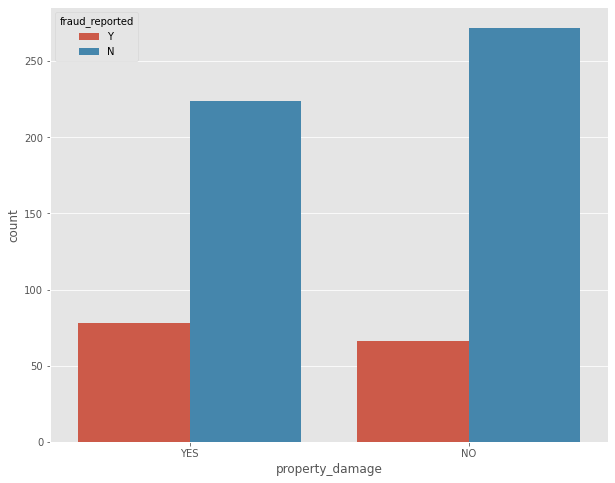

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(x='property_damage', hue='fraud_reported', data=df)

<AxesSubplot:xlabel='witnesses', ylabel='count'>

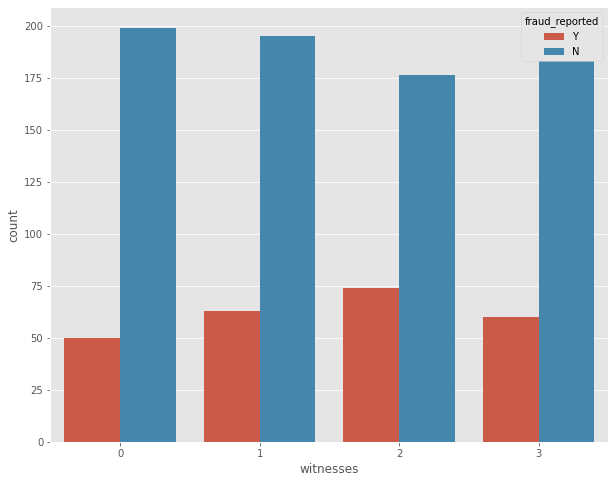

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(x='witnesses', hue='fraud_reported', data=df)

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

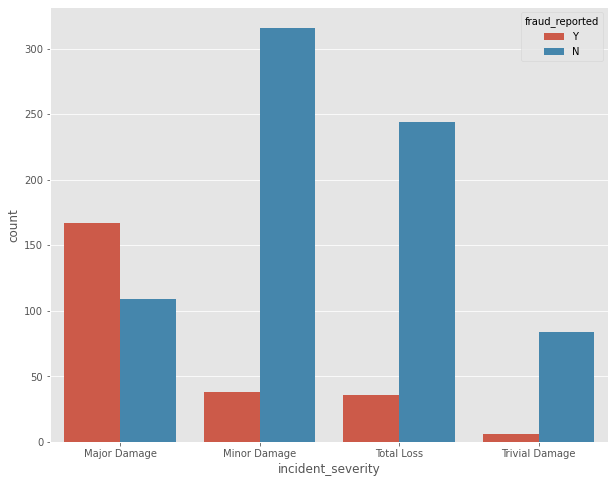

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(x='incident_severity', hue='fraud_reported', data=df)

Again looking at the count plots we are able to draw the following conclusions:
    
    1. Majority of the cases where fraud was reported had a major damage as the severity of the incident
    2. When 2 people were hurt, there was a slightly greater chance of a fraud claim in order to claim money from the insurance company
    3. In almost 35% of the total cases, we were not able to find out if property damage took place
    4. The number of witnesses didn't have a major impact of the fraud reported as the cases were evenly spread out

In [24]:
#Cross tab to find the education level of the people who made fraudulent claims
pd.crosstab(df.insured_education_level,df.fraud_reported)
percent_injury = ((df[df['fraud_reported'] == 'Y'].groupby('insured_education_level').agg('count'))/(df.groupby('insured_education_level').agg('count')) *100)['fraud_reported']
percent_injury

insured_education_level
Associate      23.448276
College        26.229508
High School    22.500000
JD             26.086957
MD             26.388889
Masters        22.377622
PhD            26.400000
Name: fraud_reported, dtype: float64

<AxesSubplot:xlabel='insured_hobbies'>

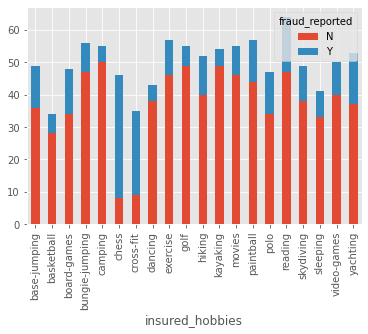

In [25]:
#Using a Cross tab to find the hobbies of the people who made fraudulent claims
pd.crosstab(df.insured_hobbies,df.fraud_reported).plot(kind='bar',stacked=True)

In [26]:
percent_injury = ((df[df['fraud_reported'] == 'Y'].groupby('insured_hobbies').agg('count'))/(df.groupby('insured_hobbies').agg('count')) *100)['fraud_reported']
percent_injury

insured_hobbies
base-jumping      26.530612
basketball        17.647059
board-games       29.166667
bungie-jumping    16.071429
camping            9.090909
chess             82.608696
cross-fit         74.285714
dancing           11.627907
exercise          19.298246
golf              10.909091
hiking            23.076923
kayaking           9.259259
movies            16.363636
paintball         22.807018
polo              27.659574
reading           26.562500
skydiving         22.448980
sleeping          19.512195
video-games       20.000000
yachting          30.188679
Name: fraud_reported, dtype: float64

Looking at the above tabs, we are able to see that

    1. People who have chess, cross-fit as a hobby are very likely to report fraud(almost 75% + of the people having these hobbies are likely to report a fraudulent claim)
    2. People with a higher level of education are slighly more likely to report fraud except those who have Masters. The rest of the people with higher levels of education(PHD,MD,and JD - which is a degree in law) are atleast 25% likely to report fraud.

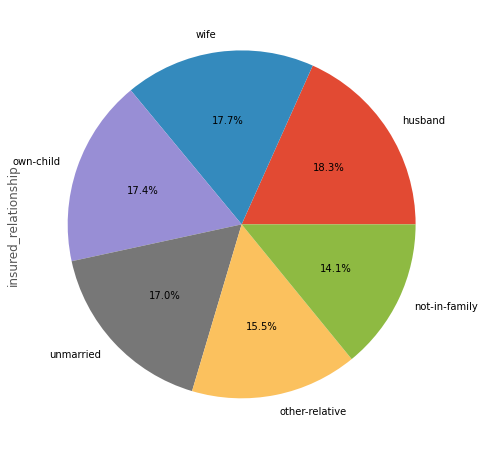

In [27]:
plt.figure(figsize=(10,8))
ax=(df['insured_relationship'].value_counts()*100/len(df)).plot.pie(autopct='%.1f%%',labels=['husband','wife','own-child','unmarried','other-relative','not-in-family'])

In [28]:
pd.crosstab(df.insured_relationship,df.fraud_reported)

fraud_reported          N   Y
insured_relationship         
husband               135  35
not-in-family         129  45
other-relative        125  52
own-child             144  39
unmarried             107  34
wife                  113  42

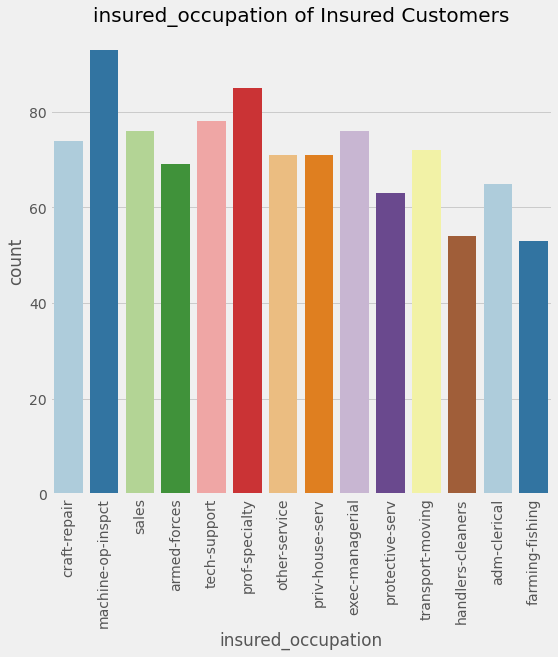

In [29]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8, 8)

sns.countplot(df['insured_occupation'], palette = 'Paired')
plt.title('insured_occupation of Insured Customers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='collision_type'>

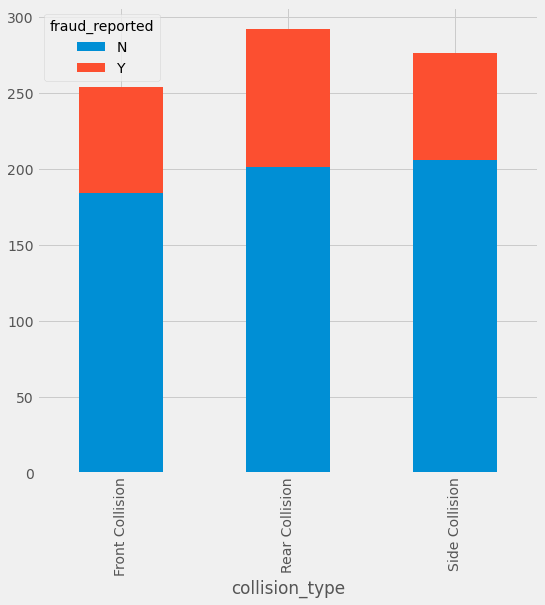

In [30]:
pd.crosstab(df.collision_type,df.fraud_reported).plot(kind='bar',stacked=True)

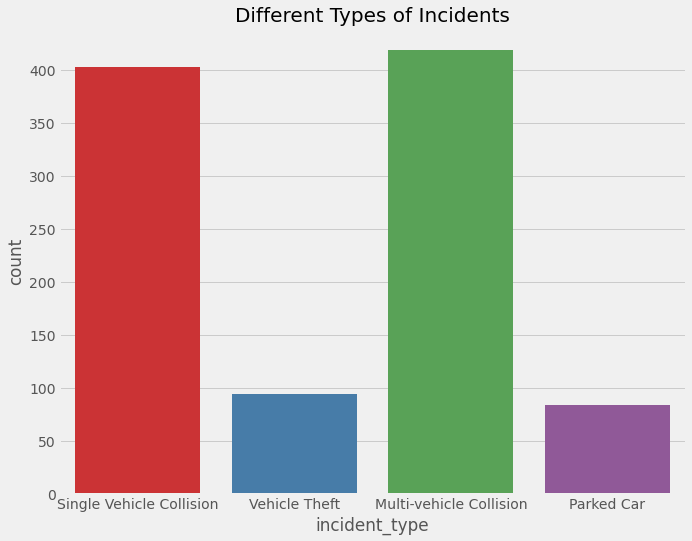

In [31]:
# let's check the incident types

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10,8)

sns.countplot(df['incident_type'], palette = 'Set1')
plt.title('Different Types of Incidents', fontsize = 20)
plt.show()

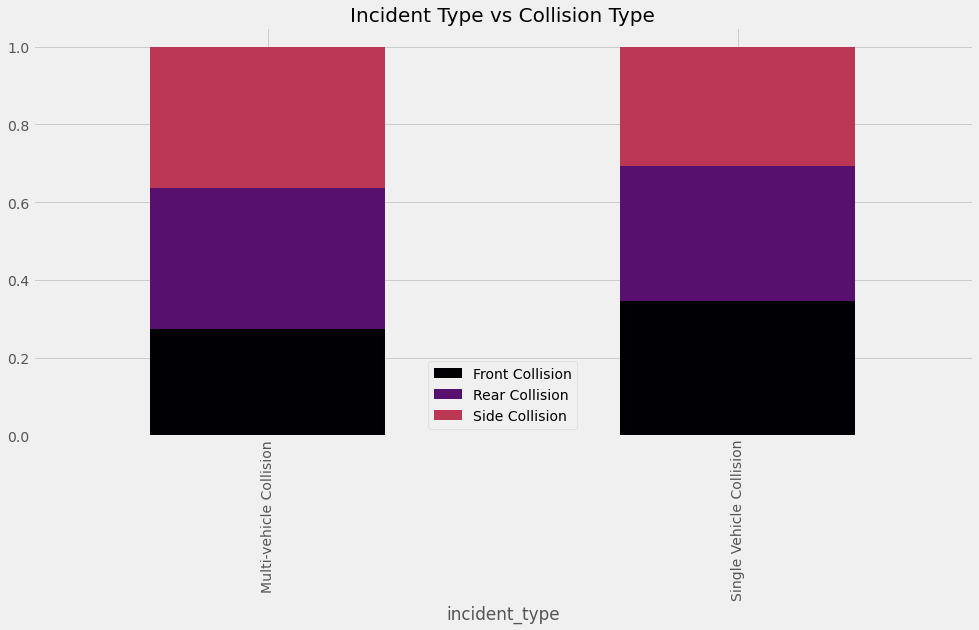

In [32]:
incident = pd.crosstab(df['incident_type'], df['collision_type'])
colors = plt.cm.inferno(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = True,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

<AxesSubplot:xlabel='insured_hobbies'>

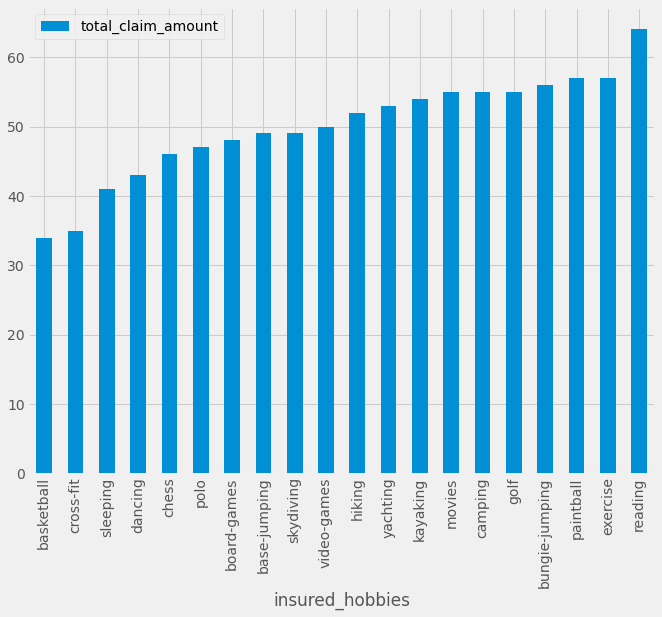

In [33]:
ax=df.groupby('insured_hobbies').agg({'total_claim_amount':'count'}).sort_values(by='total_claim_amount',ascending=True)
ax.plot(kind='bar')

auto_make
Accura        19.117647
Audi          30.434783
BMW           27.777778
Chevrolet     27.631579
Dodge         25.000000
Ford          30.555556
Honda         25.454545
Jeep          16.417910
Mercedes      33.846154
Nissan        17.948718
Saab          22.500000
Suburu        23.750000
Toyota        18.571429
Volkswagen    27.941176
Name: fraud_reported, dtype: float64

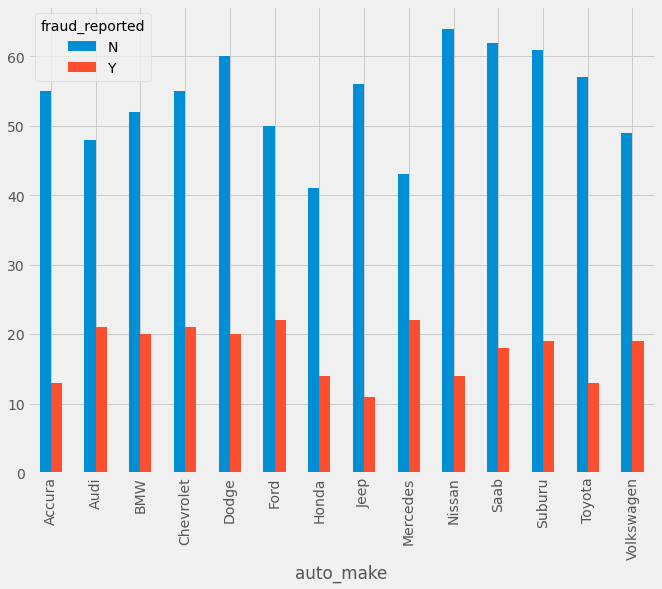

In [34]:
percent_autobrand = ((df[df['fraud_reported'] == 'Y'].groupby('auto_make').agg('count'))/(df.groupby('auto_make').agg('count')) *100)['fraud_reported']
pd.crosstab(df.auto_make,df.fraud_reported).plot(kind='bar')
percent_autobrand

Looking at the above plots, we are able to conclude that

    1. Relationship does not have a big impact on the fraud as the relationship is spread evenly
    2. People who have reading as a hobby have the highest claim amount, where as cross fit who have recorded maximum fraud claims get one of the lowest claims across the hobbies
    3. When a fraud was reported, there was a higher percentage of cases when the brand of car was Mercedes or Audi. Brandhs such as Toyota and Nissan despite having a lot of cars, has the minimum percentage of case
    4. Maximum number of cases where fraud was reported happened either due to single vehicle or multi vehicle. There were hardly any cases when the car was parked or theft was involved

In [35]:
#Importing dependancies
import plotly.express as px
fig = px.scatter(df, x = 'months_as_customer', y = 'policy_annual_premium'
                 ,color = 'fraud_reported',marginal_x = 'rug',marginal_y = 'histogram')
fig.show()

In [36]:
fig = px.scatter_matrix(df, dimensions=['total_claim_amount', 'injury_claim', 
                                        'property_claim', 'vehicle_claim'], color = 'fraud_reported')
fig.show()

Text(0, 0.5, 'Frequency')

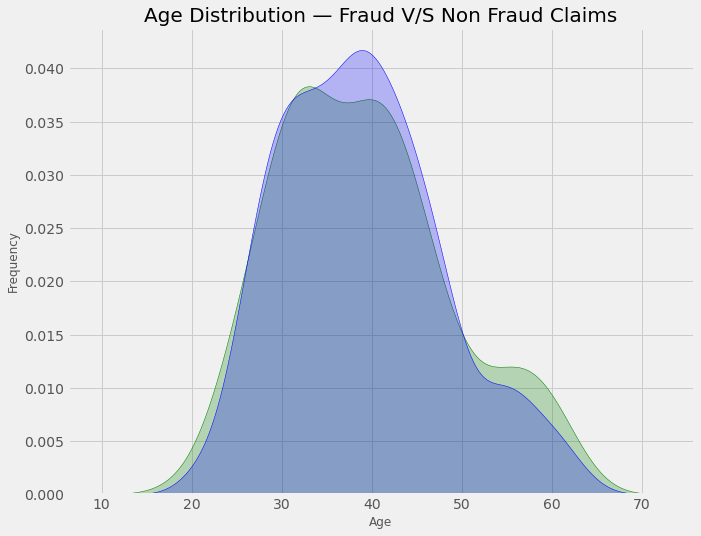

In [37]:
fig = plt.figure(figsize=(10,8))
axis = sns.kdeplot(df.loc[(df['fraud_reported'] == 'Y'),'age'] , color='g',shade=True, label='Fraudulent Claims')
axis = sns.kdeplot(df.loc[(df['fraud_reported'] == 'N'),'age'] , color='b',shade=True, label='Nonfraudulent Claims')
plt.title('Age Distribution — Fraud V/S Non Fraud Claims', fontsize = 20)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)

## Feature Engineering

In [38]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [39]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [40]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [41]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [42]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

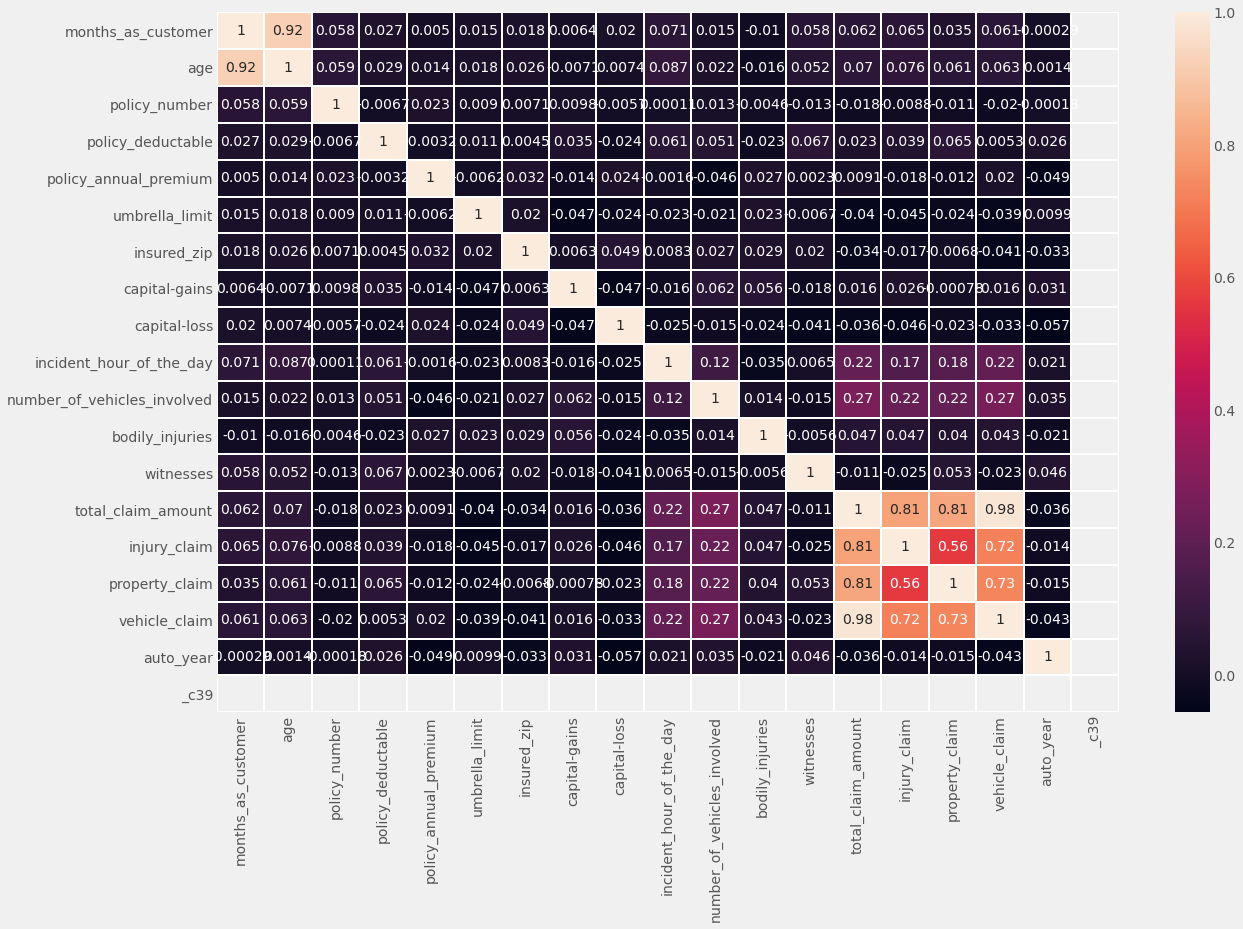

In [43]:
# heatmap

plt.figure(figsize = (18, 12))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [44]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [45]:
# dropping columns which are not necessary for prediction

to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

df.drop(to_drop, inplace = True, axis = 1)

In [46]:
df.head()

months_as_customer  age policy_csl  policy_deductable  \
0                 328   48    250/500               1000   
1                 228   42    250/500               2000   
2                 134   29    100/300               2000   
3                 256   41    250/500               2000   
4                 228   44   500/1000               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_relationship  ...  number_of_vehicles_involved  \
0       craft-repair              husband  ...                            1   
1  machine-op-inspct       other-relative  ...                            1   
2              sales            own-child  ...                            3   
3       armed-forces            unmarried  ...                            1   
4              sales            unmarried  ...                            1   

   property_damage bodily_injuries witnesses police_report_available  \
0              YES               1         2                     YES   
1               NO               0         0                      NO   
2               NO               2         3                      NO   
3               NO               1         2                      NO   
4               NO               0         1                      NO   

  total_claim_amount  injury_claim  property_claim vehicle_claim  \
0              71610          6510           13020         52080   
1               5070           780             780          3510   
2              34650          7700            3850         23100   
3              63400          6340            6340         50720   
4               6500          1300             650          4550   

   fraud_reported  
0               Y  
1               Y  
2               N  
3               Y  
4               N  

[5 rows x 27 columns]

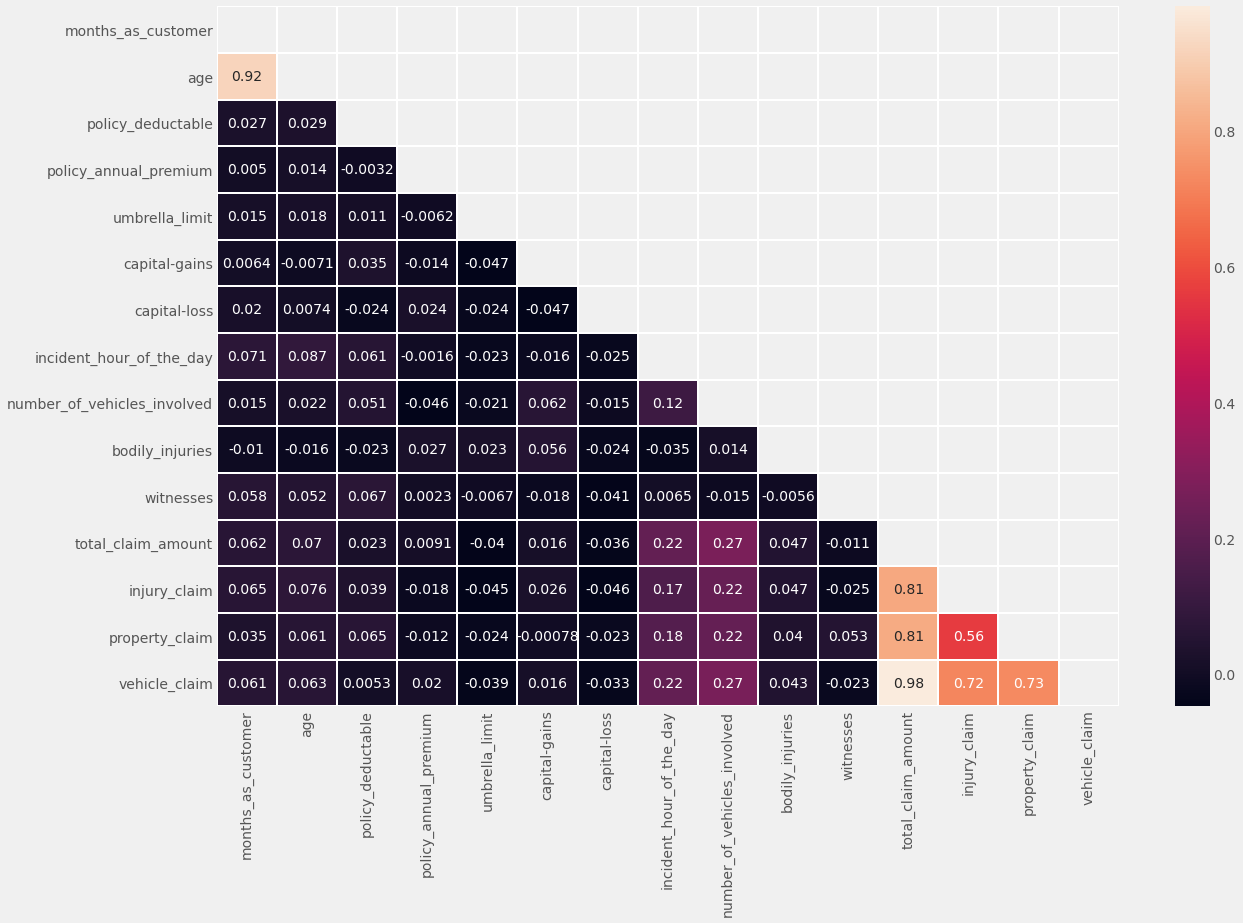

In [47]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

**From the above plot, we can see that there is high correlation between `age` and `months_as_customer`.We will drop the "Age" column. Also there is high correlation between `total_clam_amount`, `injury_claim`, `property_claim`, `vehicle_claim` as total claim is the sum of all others. So we will drop the total claim column.**

In [48]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [49]:
df.head()

months_as_customer policy_csl  policy_deductable  policy_annual_premium  \
0                 328    250/500               1000                1406.91   
1                 228    250/500               2000                1197.22   
2                 134    100/300               2000                1413.14   
3                 256    250/500               2000                1415.74   
4                 228   500/1000               1000                1583.91   

   umbrella_limit insured_sex insured_education_level insured_occupation  \
0               0        MALE                      MD       craft-repair   
1         5000000        MALE                      MD  machine-op-inspct   
2         5000000      FEMALE                     PhD              sales   
3         6000000      FEMALE                     PhD       armed-forces   
4         6000000        MALE               Associate              sales   

  insured_relationship  capital-gains  ...  incident_hour_of_the_day  \
0              husband          53300  ...                         5   
1       other-relative              0  ...                         8   
2            own-child          35100  ...                         7   
3            unmarried          48900  ...                         5   
4            unmarried          66000  ...                        20   

  number_of_vehicles_involved property_damage bodily_injuries witnesses  \
0                           1             YES               1         2   
1                           1              NO               0         0   
2                           3              NO               2         3   
3                           1              NO               1         2   
4                           1              NO               0         1   

   police_report_available  injury_claim property_claim  vehicle_claim  \
0                      YES          6510          13020          52080   
1                       NO           780            780           3510   
2                       NO          7700           3850          23100   
3                       NO          6340           6340          50720   
4                       NO          1300            650           4550   

   fraud_reported  
0               Y  
1               Y  
2               N  
3               Y  
4               N  

[5 rows x 25 columns]

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

In [51]:
# separating the feature and target columns

X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

#### Encoding Categorical columns

In [52]:
# extracting categorical columns
cat_df = X.select_dtypes(include = ['object'])

In [53]:
cat_df.head()

policy_csl insured_sex insured_education_level insured_occupation  \
0    250/500        MALE                      MD       craft-repair   
1    250/500        MALE                      MD  machine-op-inspct   
2    100/300      FEMALE                     PhD              sales   
3    250/500      FEMALE                     PhD       armed-forces   
4   500/1000        MALE               Associate              sales   

  insured_relationship             incident_type   collision_type  \
0              husband  Single Vehicle Collision   Side Collision   
1       other-relative             Vehicle Theft   Rear Collision   
2            own-child   Multi-vehicle Collision   Rear Collision   
3            unmarried  Single Vehicle Collision  Front Collision   
4            unmarried             Vehicle Theft   Rear Collision   

  incident_severity authorities_contacted property_damage  \
0      Major Damage                Police             YES   
1      Minor Damage                Police              NO   
2      Minor Damage                Police              NO   
3      Major Damage                Police              NO   
4      Minor Damage                  None              NO   

  police_report_available  
0                     YES  
1                      NO  
2                      NO  
3                      NO  
4                      NO

In [54]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'None' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [55]:
cat_df = pd.get_dummies(cat_df, drop_first = True)

In [56]:
cat_df.head()

policy_csl_250/500  policy_csl_500/1000  insured_sex_MALE  \
0                   1                    0                 1   
1                   1                    0                 1   
2                   0                    0                 0   
3                   1                    0                 0   
4                   0                    1                 1   

   insured_education_level_College  insured_education_level_High School  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                                0                                    0   

   insured_education_level_JD  insured_education_level_MD  \
0                           0                           1   
1                           0                           1   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   insured_education_level_Masters  insured_education_level_PhD  \
0                                0                            0   
1                                0                            0   
2                                0                            1   
3                                0                            1   
4                                0                            0   

   insured_occupation_armed-forces  ...  collision_type_Side Collision  \
0                                0  ...                              1   
1                                0  ...                              0   
2                                0  ...                              0   
3                                1  ...                              0   
4                                0  ...                              0   

   incident_severity_Minor Damage  incident_severity_Total Loss  \
0                               0                             0   
1                               1                             0   
2                               1                             0   
3                               0                             0   
4                               1                             0   

   incident_severity_Trivial Damage  authorities_contacted_Fire  \
0                                 0                           0   
1                                 0                           0   
2                                 0                           0   
3                                 0                           0   
4                                 0                           0   

   authorities_contacted_None  authorities_contacted_Other  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           1                            0   

   authorities_contacted_Police  property_damage_YES  \
0                             1                    1   
1                             1                    0   
2                             1                    0   
3                             1                    0   
4                             0                    0   

   police_report_available_YES  
0                            1  
1                            0  
2                            0  
3                            0  
4                            0  

[5 rows x 41 columns]

In [57]:
# extracting the numerical columns
num_df = X.select_dtypes(include = ['int64'])

In [58]:
num_df.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
0                 328               1000               0          53300   
1                 228               2000         5000000              0   
2                 134               2000         5000000          35100   
3                 256               2000         6000000          48900   
4                 228               1000         6000000          66000   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0             0                         5                            1   
1             0                         8                            1   
2             0                         7                            3   
3        -62400                         5                            1   
4        -46000                        20                            1   

   bodily_injuries  witnesses  injury_claim  property_claim  vehicle_claim  
0                1          2          6510           13020          52080  
1                0          0           780             780           3510  
2                2          3          7700            3850          23100  
3                1          2          6340            6340          50720  
4                0          1          1300             650           4550

In [59]:
# combining the Numerical and Categorical dataframes to get the final dataset
X = pd.concat([num_df, cat_df], axis = 1)

In [60]:
X.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
0                 328               1000               0          53300   
1                 228               2000         5000000              0   
2                 134               2000         5000000          35100   
3                 256               2000         6000000          48900   
4                 228               1000         6000000          66000   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0             0                         5                            1   
1             0                         8                            1   
2             0                         7                            3   
3        -62400                         5                            1   
4        -46000                        20                            1   

   bodily_injuries  witnesses  injury_claim  ...  \
0                1          2          6510  ...   
1                0          0           780  ...   
2                2          3          7700  ...   
3                1          2          6340  ...   
4                0          1          1300  ...   

   collision_type_Side Collision  incident_severity_Minor Damage  \
0                              1                               0   
1                              0                               1   
2                              0                               1   
3                              0                               0   
4                              0                               1   

   incident_severity_Total Loss  incident_severity_Trivial Damage  \
0                             0                                 0   
1                             0                                 0   
2                             0                                 0   
3                             0                                 0   
4                             0                                 0   

   authorities_contacted_Fire  authorities_contacted_None  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           1   

   authorities_contacted_Other  authorities_contacted_Police  \
0                            0                             1   
1                            0                             1   
2                            0                             1   
3                            0                             1   
4                            0                             0   

   property_damage_YES  police_report_available_YES  
0                    1                            1  
1                    0                            0  
2                    0                            0  
3                    0                            0  
4                    0                            0  

[5 rows x 53 columns]

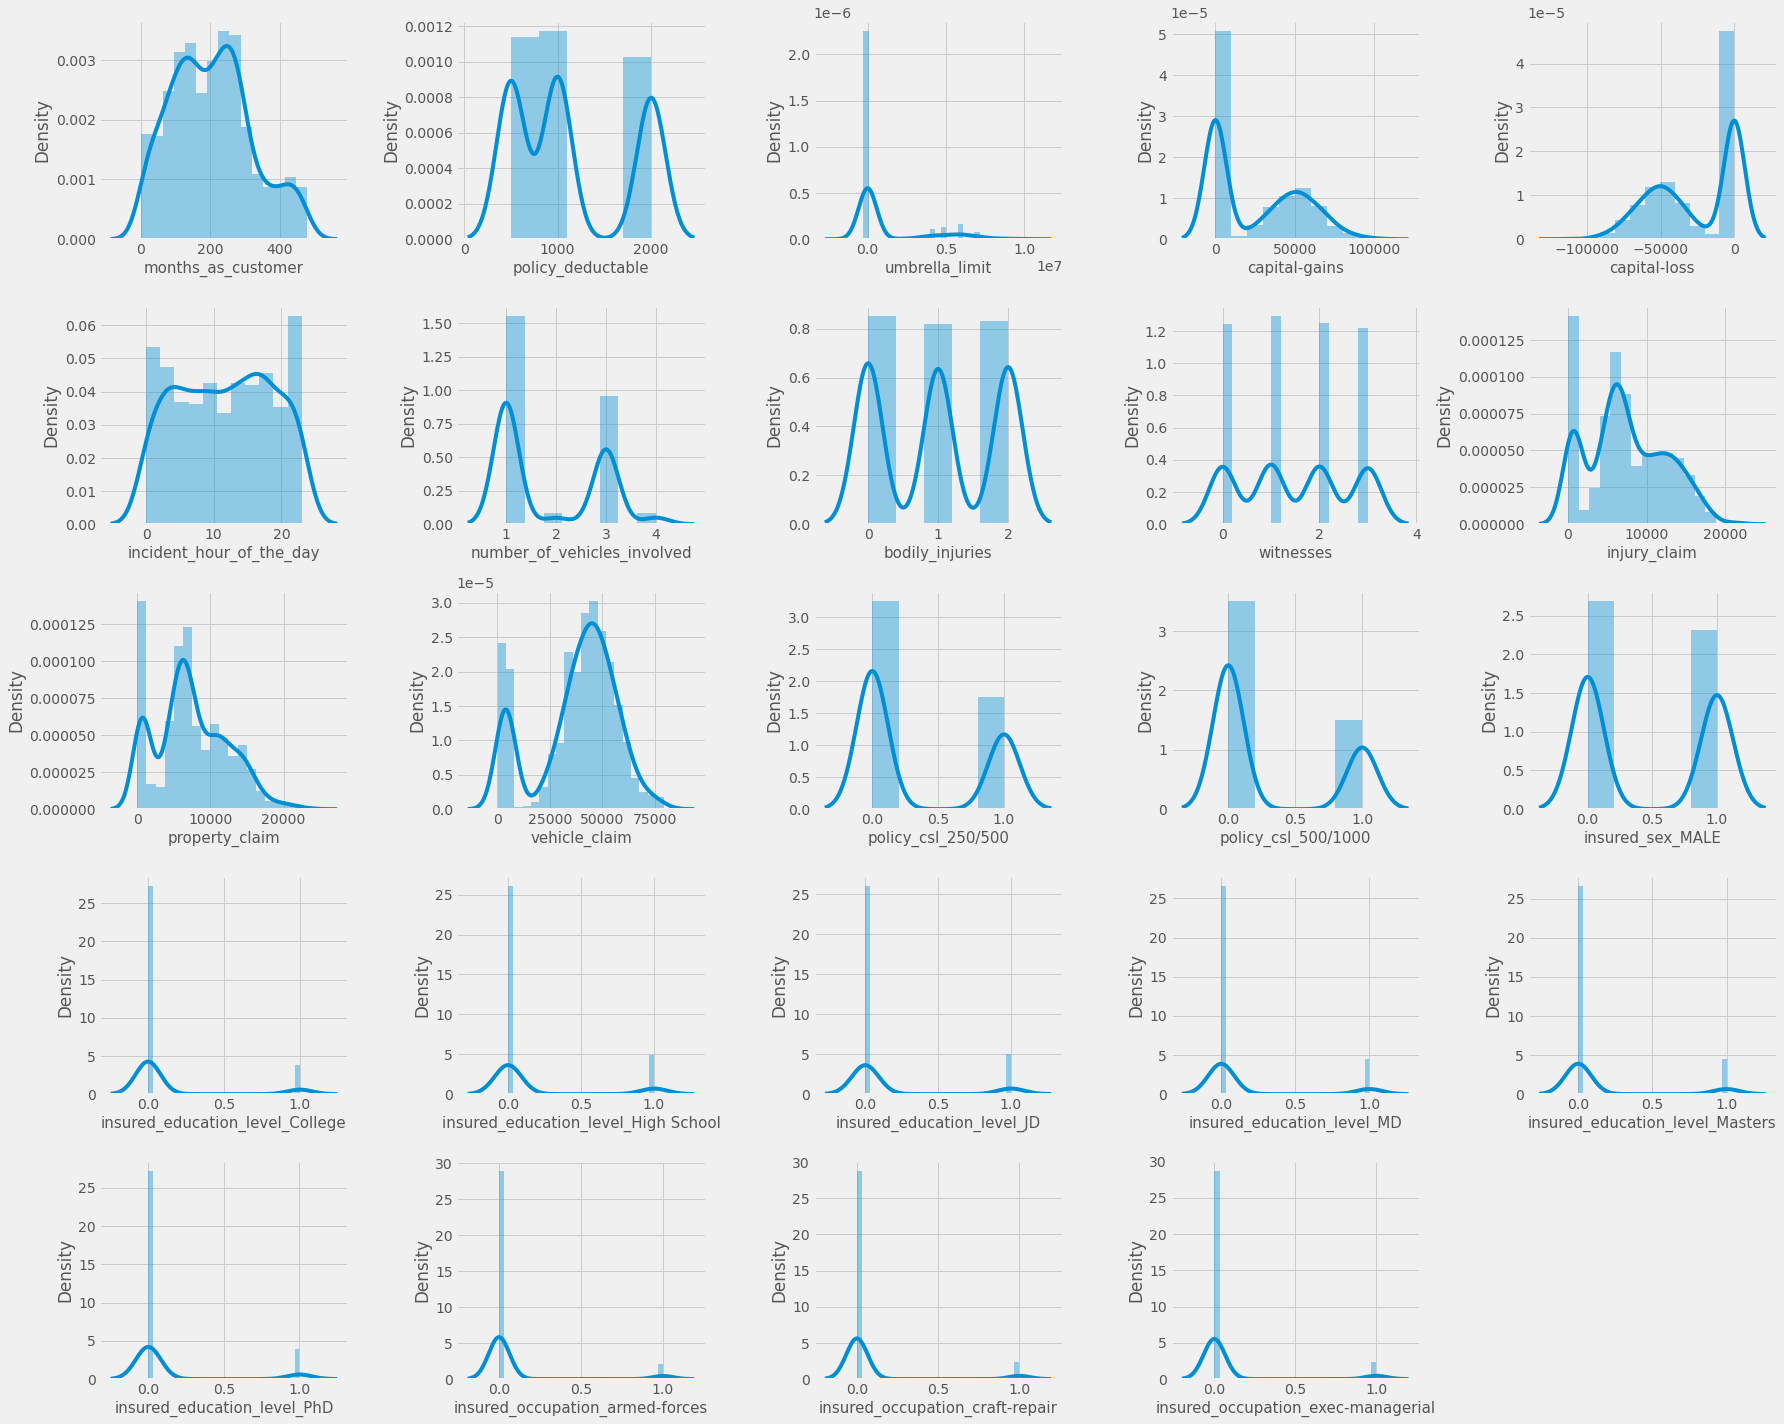

In [61]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

**Data looks good, let's check for outliers.**

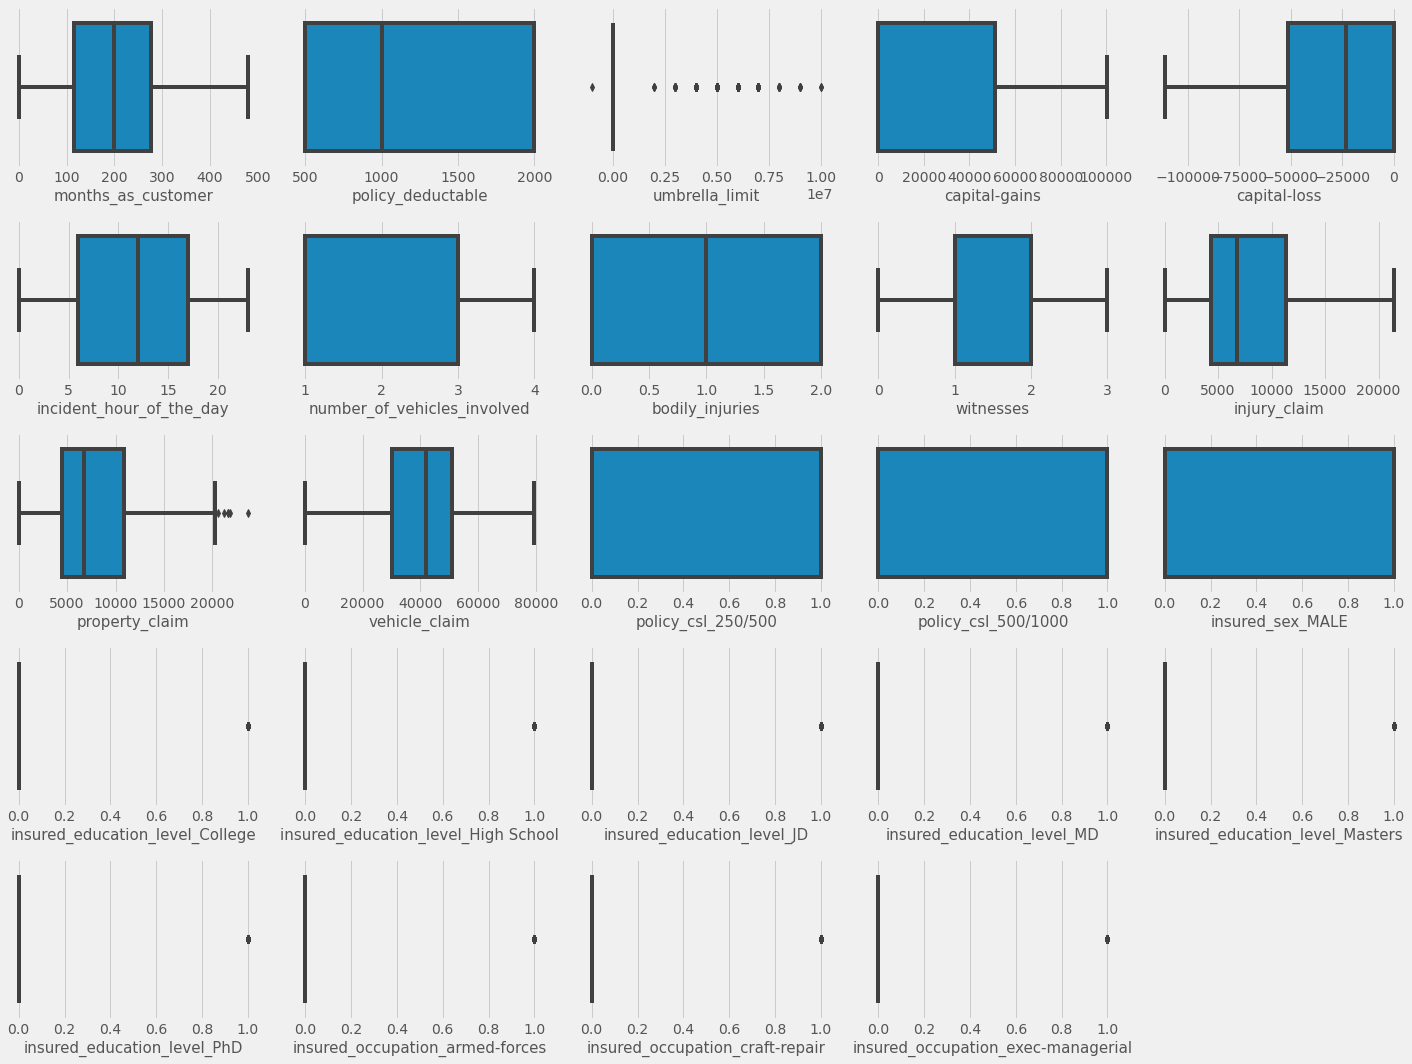

In [62]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

**Outliers are present in some numerical columns we will scale numerical columns later**

In [63]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [64]:
X_train.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
759                 155               1000               0          83600   
318                   1                500               0              0   
820                  65               1000               0              0   
986                 232                500               0              0   
631                 147               1000         6000000              0   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
759             0                         0                            1   
318             0                         1                            3   
820             0                        14                            1   
986        -58400                        11                            1   
631        -48400                         2                            2   

     bodily_injuries  witnesses  injury_claim  ...  \
759                0          3          8060  ...   
318                1          0          6340  ...   
820                0          0           720  ...   
986                2          3         15400  ...   
631                1          2          9760  ...   

     collision_type_Side Collision  incident_severity_Minor Damage  \
759                              0                               1   
318                              0                               1   
820                              0                               0   
986                              0                               1   
631                              0                               0   

     incident_severity_Total Loss  incident_severity_Trivial Damage  \
759                             0                                 0   
318                             0                                 0   
820                             0                                 1   
986                             0                                 0   
631                             1                                 0   

     authorities_contacted_Fire  authorities_contacted_None  \
759                           0                           0   
318                           0                           0   
820                           0                           1   
986                           0                           0   
631                           0                           0   

     authorities_contacted_Other  authorities_contacted_Police  \
759                            0                             0   
318                            0                             1   
820                            0                             0   
986                            1                             0   
631                            1                             0   

     property_damage_YES  police_report_available_YES  
759                    0                            0  
318                    0                            0  
820                    0                            0  
986                    1                            0  
631                    0                            0  

[5 rows x 53 columns]

In [65]:
num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [66]:
# Scaling the numeric values in the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [67]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
759           -0.434225          -0.208628       -0.457389        2.06214   
318           -1.763027          -1.032157       -0.457389       -0.91606   
820           -1.210798          -0.208628       -0.457389       -0.91606   
986            0.230176          -1.032157       -0.457389       -0.91606   
631           -0.503254          -0.208628        2.268770       -0.91606   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
759      0.962091                 -1.626311                    -0.819943   
318      0.962091                 -1.483869                     1.160596   
820      0.962091                  0.367881                    -0.819943   
986     -1.080535                 -0.059446                    -0.819943   
631     -0.730771                 -1.341427                     0.170326   

     bodily_injuries  witnesses  injury_claim  property_claim  vehicle_claim  
759        -1.264462   1.366435      0.117039        0.113613      -0.297936  
318        -0.037623  -1.351937     -0.231452       -0.866919      -0.815958  
820        -1.264462  -1.351937     -1.370127       -1.213815      -1.699944  
986         1.189216   1.366435      1.604206        0.041427       0.818516  
631        -0.037623   0.460311      0.461478       -0.524034       0.052566

In [68]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)

In [69]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)

In [70]:
X_train.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
759           -0.434225          -0.208628       -0.457389        2.06214   
318           -1.763027          -1.032157       -0.457389       -0.91606   
820           -1.210798          -0.208628       -0.457389       -0.91606   
986            0.230176          -1.032157       -0.457389       -0.91606   
631           -0.503254          -0.208628        2.268770       -0.91606   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
759      0.962091                 -1.626311                    -0.819943   
318      0.962091                 -1.483869                     1.160596   
820      0.962091                  0.367881                    -0.819943   
986     -1.080535                 -0.059446                    -0.819943   
631     -0.730771                 -1.341427                     0.170326   

     bodily_injuries  witnesses  injury_claim  ...  \
759        -1.264462   1.366435      0.117039  ...   
318        -0.037623  -1.351937     -0.231452  ...   
820        -1.264462  -1.351937     -1.370127  ...   
986         1.189216   1.366435      1.604206  ...   
631        -0.037623   0.460311      0.461478  ...   

     collision_type_Side Collision  incident_severity_Minor Damage  \
759                              0                               1   
318                              0                               1   
820                              0                               0   
986                              0                               1   
631                              0                               0   

     incident_severity_Total Loss  incident_severity_Trivial Damage  \
759                             0                                 0   
318                             0                                 0   
820                             0                                 1   
986                             0                                 0   
631                             1                                 0   

     authorities_contacted_Fire  authorities_contacted_None  \
759                           0                           0   
318                           0                           0   
820                           0                           1   
986                           0                           0   
631                           0                           0   

     authorities_contacted_Other  authorities_contacted_Police  \
759                            0                             0   
318                            0                             1   
820                            0                             0   
986                            1                             0   
631                            1                             0   

     property_damage_YES  police_report_available_YES  
759                    0                            0  
318                    0                            0  
820                    0                            0  
986                    1                            0  
631                    0                            0  

[5 rows x 53 columns]

### Support Vector Classifier

In [71]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [72]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Support Vector Classifier is : 0.8493333333333334
Test accuracy of Support Vector Classifier is : 0.744
[[186   0]
 [ 64   0]]
              precision    recall  f1-score   support

           N       0.74      1.00      0.85       186
           Y       0.00      0.00      0.00        64

    accuracy                           0.74       250
   macro avg       0.37      0.50      0.43       250
weighted avg       0.55      0.74      0.63       250



### KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [74]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 0.756
Test accuracy of KNN is : 0.744
[[186   0]
 [ 64   0]]
              precision    recall  f1-score   support

           N       0.74      1.00      0.85       186
           Y       0.00      0.00      0.00        64

    accuracy                           0.74       250
   macro avg       0.37      0.50      0.43       250
weighted avg       0.55      0.74      0.63       250



### Decision Tree Classifier

In [75]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [76]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.392
[[ 75 111]
 [ 41  23]]
              precision    recall  f1-score   support

           N       0.65      0.40      0.50       186
           Y       0.17      0.36      0.23        64

    accuracy                           0.39       250
   macro avg       0.41      0.38      0.36       250
weighted avg       0.52      0.39      0.43       250



In [77]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [78]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 6}
0.812


In [79]:
# best estimator 

dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

In [80]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.8186666666666667
Test accuracy of Decision Tree is : 0.74
[[142  44]
 [ 21  43]]
              precision    recall  f1-score   support

           N       0.87      0.76      0.81       186
           Y       0.49      0.67      0.57        64

    accuracy                           0.74       250
   macro avg       0.68      0.72      0.69       250
weighted avg       0.77      0.74      0.75       250



### Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

In [82]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 0.9546666666666667
Test accuracy of Random Forest is : 0.756
[[182   4]
 [ 57   7]]
              precision    recall  f1-score   support

           N       0.76      0.98      0.86       186
           Y       0.64      0.11      0.19        64

    accuracy                           0.76       250
   macro avg       0.70      0.54      0.52       250
weighted avg       0.73      0.76      0.69       250



### Ada Boost Classifier

In [83]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                min_samples_leaf=4,
                                                                                min_samples_split=6)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [84]:
# best parameter and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 180}
0.8133333333333335


In [85]:
# best estimator 

ada = grid_search.best_estimator_

y_pred = ada.predict(X_test)

In [86]:
# accuracy_score, confusion_matrix and classification_report

ada_train_acc = accuracy_score(y_train, ada.predict(X_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Ada Boost is : {ada_train_acc}")
print(f"Test accuracy of Ada Boost is : {ada_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Ada Boost is : 0.8146666666666667
Test accuracy of Ada Boost is : 0.804
[[159  27]
 [ 22  42]]
              precision    recall  f1-score   support

           N       0.88      0.85      0.87       186
           Y       0.61      0.66      0.63        64

    accuracy                           0.80       250
   macro avg       0.74      0.76      0.75       250
weighted avg       0.81      0.80      0.81       250



### XgBoost Classifier

In [108]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

[03:35:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [88]:
# accuracy_score, confusion_matrix and classification_report

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 1.0
Test accuracy of XgBoost is : 0.756
[[167  19]
 [ 42  22]]
              precision    recall  f1-score   support

           N       0.80      0.90      0.85       186
           Y       0.54      0.34      0.42        64

    accuracy                           0.76       250
   macro avg       0.67      0.62      0.63       250
weighted avg       0.73      0.76      0.74       250



In [89]:
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1)}

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                min_samples_leaf=4,
                                                                                min_samples_split=6)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [90]:
# best estimator 
xgb = grid_search.best_estimator_
y_pred = xgb.predict(X_test)

### Voting Classifier

In [92]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Support Vector Classifier', svc), ('KNN', knn),  ('Decision Tree', dtc), ('Random Forest', rand_clf),
               ('Ada Boost', ada), ('XGboost', xgb)]

vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

In [93]:
# accuracy_score, confusion_matrix and classification_report

vc_train_acc = accuracy_score(y_train, vc.predict(X_train))
vc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Voting Classifier is : {vc_train_acc}")
print(f"Test accuracy of Voting Classifier is : {vc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Voting Classifier is : 0.9093333333333333
Test accuracy of Voting Classifier is : 0.784
[[177   9]
 [ 45  19]]
              precision    recall  f1-score   support

           N       0.80      0.95      0.87       186
           Y       0.68      0.30      0.41        64

    accuracy                           0.78       250
   macro avg       0.74      0.62      0.64       250
weighted avg       0.77      0.78      0.75       250



In [94]:
models = pd.DataFrame({
    'Model' : ['SVC', 'KNN', 'Decision Tree', 'Random Forest','Ada Boost',
             'XgBoost', 'Voting Classifier'],
    'Score' : [svc_test_acc, knn_test_acc, dtc_test_acc, rand_clf_test_acc, ada_test_acc, xgb_test_acc, vc_test_acc]
})


models.sort_values(by = 'Score', ascending = False)

Model  Score
4          Ada Boost  0.804
5            XgBoost  0.804
6  Voting Classifier  0.784
3      Random Forest  0.756
0                SVC  0.744
1                KNN  0.744
2      Decision Tree  0.740

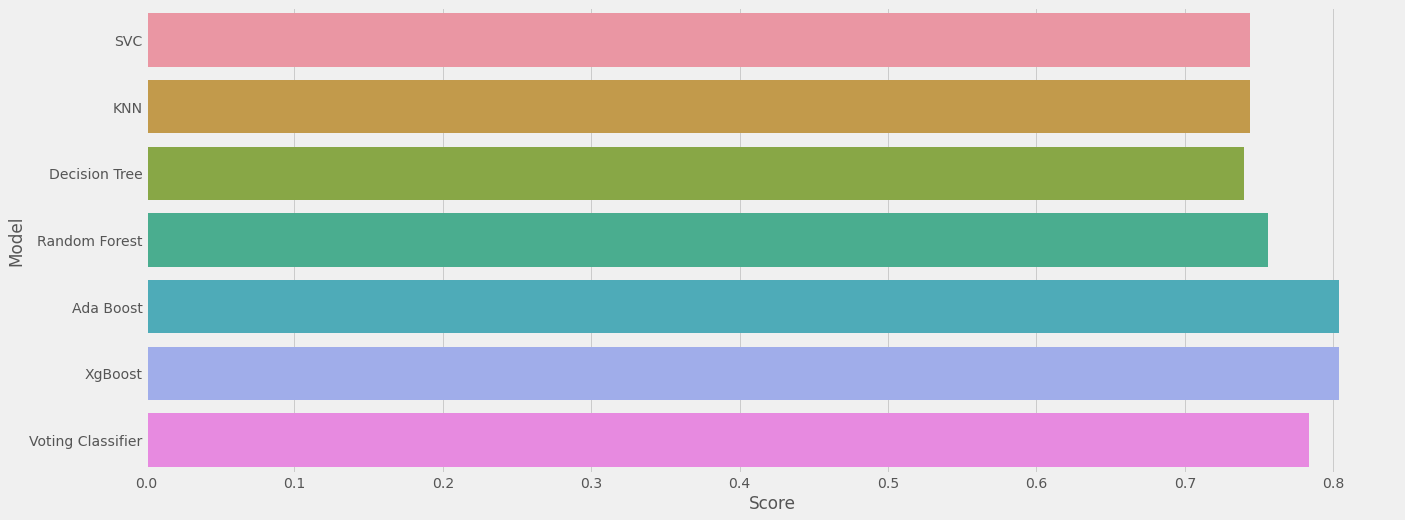

In [95]:
plt.figure(figsize = (20, 8))

sns.barplot(x = 'Score', y = 'Model', data = models)
plt.show()

Conclusions:

        1. Adaboost and XGBoost have the highest accuracy and can be chosen in order to build a model which predicts if a fraud happens or not.

#### Saving the best model

In [114]:
best_model = AdaBoostClassifier(algorithm='SAMME',learning_rate=0.01,n_estimators=180)

In [115]:
best_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.01, n_estimators=180)

In [116]:
best_model.score(X_test,y_test)

0.744

In [118]:
# saving the best model
import joblib
joblib.dump(best_model,'Automobile_fraud.pkl')

['Automobile_fraud.pkl']